# Tuberculosis Detection using Chest X-ray with Deep Learning

## Introduction
Tuberculosis (TB) is a highly contagious infectious disease that primarily affects the lungs. Early and accurate detection of TB is crucial for effective treatment and control of the disease. Chest X-rays are commonly used in TB diagnosis due to their ability to reveal abnormalities in the lungs.

This project aims to develop a deep learning model for the binary classification of TB and normal chest X-ray images. The dataset consists of 700 TB images and 3500 normal images, ensuring a balanced representation of both classes. The goal is to train a model that can accurately classify new chest X-ray images as either TB-positive or TB-negative.

## Algorithm Recommendation
For Tuberculosis Detection using Chest X-ray images with a binary classification task (TB vs. normal), Convolutional Neural Networks (CNNs) are commonly used and have shown promising results in medical image analysis. You can consider using pre-existing CNN architectures, such as VGGNet, ResNet, or InceptionNet, as a starting point for your Tuberculosis Detection project. These architectures have demonstrated strong performance on image classification tasks and can be fine-tuned to suit your specific needs.

## Machine Learning Steps
1. Data Preprocessing
    - 1.1 Import Dataset
    - 1.2 Data Transforming
        - 1.2.1 Tabulating: Converting Image.PNG Files to NumPy Arrays
        - 1.2.2 Color Conversion
        - 1.2.3 Resizing the Images
    - 1.3 Data Check-up
        - 1.3.1 Histogram Analysis
    - 1.4 Data Augmentation (Optional) + Clinical Perspective
    - 1.5 Data Preparation
    - 1.6 Image Enhancement
        - 1.6.2 Histogram Equalization
        - 1.6.3 Adaptive Histogram Equalization
    - 1.7 Normalization
        - 1.7.1 Min-Max Normalization
    - 1.8 Principal Component Analysis (PCA)
        - 1.8.1 Finding Optimum Number of Principal Components
        - 1.8.2 Image Reconstruction
    - 1.9 Store the Dataset/Reference
2. CNN
    - 2.1 How CNNs Work
    - 2.2 Layers
        - 2.2.1 Convolutional Layers
        - 2.2.2 Pooling Layers
        - 2.2.3 Dropout Layer
        - 2.2.4 Flatten Layer
        - 2.2.5 Fully Connected (Dense) Layers
        - 2.2.6 Output Layers
    - 2.3 Hyperparameters
        - 2.3.1 Padding
        - 2.3.2 Kernel Size
        - 2.3.3 Stride
    - 2.4 Activation Functions
        - 2.4.1 ReLU Activation Function
        - 2.4.2 Sigmoid Activation Function
    - 2.5 Tensorflow and Keras
    - 2.6 Architecture
    - 2.7 Adam Gradient Descent Optimization
3. Experimentation
    - 3.8.1 Importing Utility
    - 3.8.2 Loading the Dataset
    - 3.8.3 Splitting the Dataset
    - 3.8.4 Generating Real-world/Unseen Data
    - 3.8.5 Experimentation
        - Experiment 1: Building the First CNN Model
        - Experiment 2: Comparing Optimizers
        - Experiment 3: Comparing Pooling Techniques
        - Experiment 4: Tuning Hyperparameters - Padding, Kernel Size, and Stride
        - Experiment 5: Hyperparameter Optimization
            - Experiment 5.1: Learning Rate ($\lambda$) for Adam
            - Experiment 5.2: Epsilon ($\epsilon$) for Adam
            - Experiment 5.3: Batch Size
            - Experiment 5.4: Number of Epochs
        - Experiment 6: Image Enhancement Techniques
        - Experiment 7: Impact of Varying Unit Sizes in Neural Network Layers
        - Experiment 8: Exploring Different Image Input Sizes
    - 3.8.6 Summary of Overall Experiment
        
4.Lung segmentation
5. Explainability
    - 5.1 Why Explainability Matters
    - 5.2 Explainer
        - 5.2.1 Lime Library

## Conclusion
Through this project, I aim to develop a deep learning model that can accurately classify TB and normal chest X-ray images, contributing to the advancement of TB diagnosis methods. And to bridge theoretical understanding with practical implementation, leveraging the expertise acquired from the specialization program. And explore the CNN model performance with different inputs/parameters.

The subsequent sections will provide a detailed account of the methodology, implementation steps, and results of the TB detection model development. Let's dive in!

# Let's dive in!

### Data set
The dataset consists of:
- Amount: 700 Tuberculosis images /  3500 normal images. 
- File type .PNG
- Image size: 512x512 
- Channel: 3 channel (RGB )

# Initial Notebook

In [1]:
%load_ext autoreload
%autoreload 2

## Import required libraries

In [2]:
import time
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# remove verison errors
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preprocessing
preparing the dataset for training a convolutional neural network (CNN) for tuberculosis (TB) detection. 

## 1.1 Import Dataset

- 0 represents a Normal image
- 1 represents a Tuberculosis (TB) image. 

|           Image              | Labeled |
|:---------------------------------------------------:|:---------:|
| <img src="repositorys/rawdata/Tuberculosis/Tuberculosis-1.png" alt="drawing" width="50"/> |   1   |
| <img src="repositorys/rawdata/Tuberculosis/Tuberculosis-2.png" alt="drawing" width="50"/> |    1   |
| <img src="repositorys/rawdata/Normal/Normal-1.png" alt="drawing" width="50"/> |   0   |
| <img src="repositorys/rawdata/Normal/Normal-1.png" alt="drawing" width="50"/> |     0   |
| <img src="repositorys/rawdata/Tuberculosis/Tuberculosis-1.png" alt="drawing" width="50"/> |   1   |
| <img src="repositorys/rawdata/Normal/Normal-1.png" alt="drawing" width="50"/> |    0   |
| <img src="repositorys/rawdata/Normal/Normal-1.png" alt="drawing" width="50"/> |    0   |
| <img src="repositorys/rawdata/Tuberculosis/Tuberculosis-1.png" alt="drawing" width="50"/> |   1   |
| <img src="repositorys/rawdata/Tuberculosis/Tuberculosis-1.png" alt="drawing" width="50"/> |   1   |
| <img src="repositorys/rawdata/Normal/Normal-1.png" alt="drawing" width="50"/> |   0   |


### View the variables 
<u>Read</u> 5 Training examples, And <u>check</u> the dimensions of raw data

In [3]:
from PIL import Image

RGB
(512, 512)


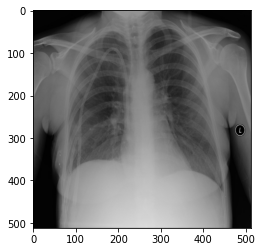

RGB
(512, 512)


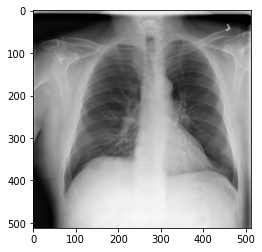

RGB
(512, 512)


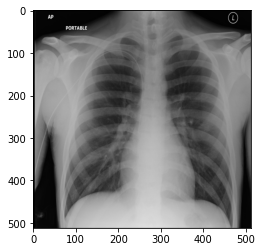

RGB
(512, 512)


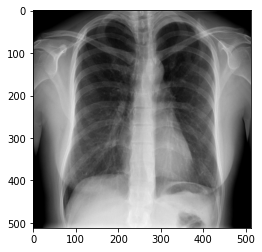

In [4]:
# range(start, stop, step)
# start index at 1
# end index at 5
for i in range(1,5):
    image = Image.open(
        f'repositorys/rawdata/Normal/Normal-{i}.png')
    print(image.mode)
    print(image.size)
    plt.imshow(image)
    plt.show()

## 1.2 Data Transforming

In this section, we discuss the process of transforming image data for tuberculosis (TB) detection.

### 1.2.1 Tabulating: Converting Image.PNG Files to NumPy Arrays

**Objective:** Array manipulation, Converting image.PNG files to NumPy arrays allows for structured and efficient data processing. 

**Impact:**

- **Pros:**
    - **Memory Efficiency:** NumPy arrays require less memory than raw image files, making it ideal for large datasets.
    - **Computational Efficiency:** NumPy array operations are optimized and faster.
    
- **Cons:**
    - **Lossy Compression:** Depending on the image format and compression settings used, converting images to NumPy arrays may involve lossy compression, which can result in some loss of image quality.
    - **Storage and Disk Space**: While NumPy arrays can be more memory-efficient, they can still consume a significant amount of disk space, especially for high-resolution images or a large number of images.

### 1.2.2 Grayscale Conversion

**Objective:** Converting images to grayscale mode simplifies data representation.

**Impact:**

- **Pros:**
    - **Memory Efficiency:** Grayscale images require less memory compared to RGB.
    - **Computational Efficiency:** Reduces computational complexity.
    - **Highlights Structural Details:** Enhances visibility of structural details for TB detection.
    
- **Cons:**
    - **Loss of Color Information:** Color-dependent patterns or abnormalities may not be detectable.

### 1.2.3 Resizing Images

**Objective:** Resizing images standardizes dimensions for efficient processing.

**Impact:**

- **Pros:**
    - **Memory Efficiency:** Smaller image sizes require less memory.
    - **Computational Efficiency:** Reduces complexity during training.
    - **Enhanced Feature Learning:** Improves the model's ability to learn important features.
    
- **Cons:**
    - **Loss of Color Information:** Some image information may be lost or distorted when resizing.

**Note:** Converting from 3-channel RGB to 1-channel Grayscale simplifies the model but may lead to color information loss. Task-specific requirements should guide your choice between grayscale and RGB images.


**Article**: Why is grayscale needed for image processing?
- It helps in simplifying algorithms and as well eliminates the complexities related to computational requirements.

- It makes room for easier learning for those who are new to image processing. This is because grayscale compressors an image to its barest minimum pixel.

- It enhances easy visualisation. It differentiates between the shadow details and the highlights of an image because it is mainly in 2 spatial dimensions (2D) rather than 3D. 

Readmore: https://www.isahit.com/blog/why-to-use-grayscale-conversion-during-image-processing#:~:text=It%20helps%20in%20simplifying%20algorithms,It%20enhances%20easy%20visualisation.


In [5]:
from numpy import asarray
import os

In [6]:
for subset in ['Normal', 'Tuberculosis']:
    images = []
    image_count = 0

    # Determine the number of images available for the current subset
    image_dir = f'repositorys/rawdata/{subset}/'
    image_files = os.listdir(image_dir)
    image_count = len(image_files)
    
    for i in range(1,image_count+1):
        # Load image as pixel array
        # .convert('L') = Convert image to grayscale
        image = Image.open(f'{image_dir}/{subset}-{i}.png').convert('L')
        resized_image = image.resize((128, 128))
     
        # convert image to numpy array
        data = asarray(resized_image)
        images.append(data)

    images_array = np.array(images)
    np.save(f'repositorys/metadata/numpy/{subset}_array.npy', images_array)


In [7]:
# Load Data set
df_norm = np.load(
    r"D:\Repo\DS\Classification\BinaryClassification\Tuberculosis\repositorys\metadata\numpy\Normal_array.npy")
df_tb = np.load(
    r"D:\Repo\DS\Classification\BinaryClassification\Tuberculosis\repositorys\metadata\numpy\Tuberculosis_array.npy")


### Training examples

In [8]:
df_norm.shape

(3500, 128, 128)

In [9]:
df_tb.shape

(700, 128, 128)

### Target

In [10]:
target_norm = np.zeros(df_norm.shape[0], dtype=np.int8)
target_tb = np.ones(df_tb.shape[0], dtype=np.int8) 

In [11]:
from scripts.utils.utility import show_image, plot_gray_scale_histogram, plot_image_distribution, plot_image_scatter, plot_scree_cumulative

### Normal

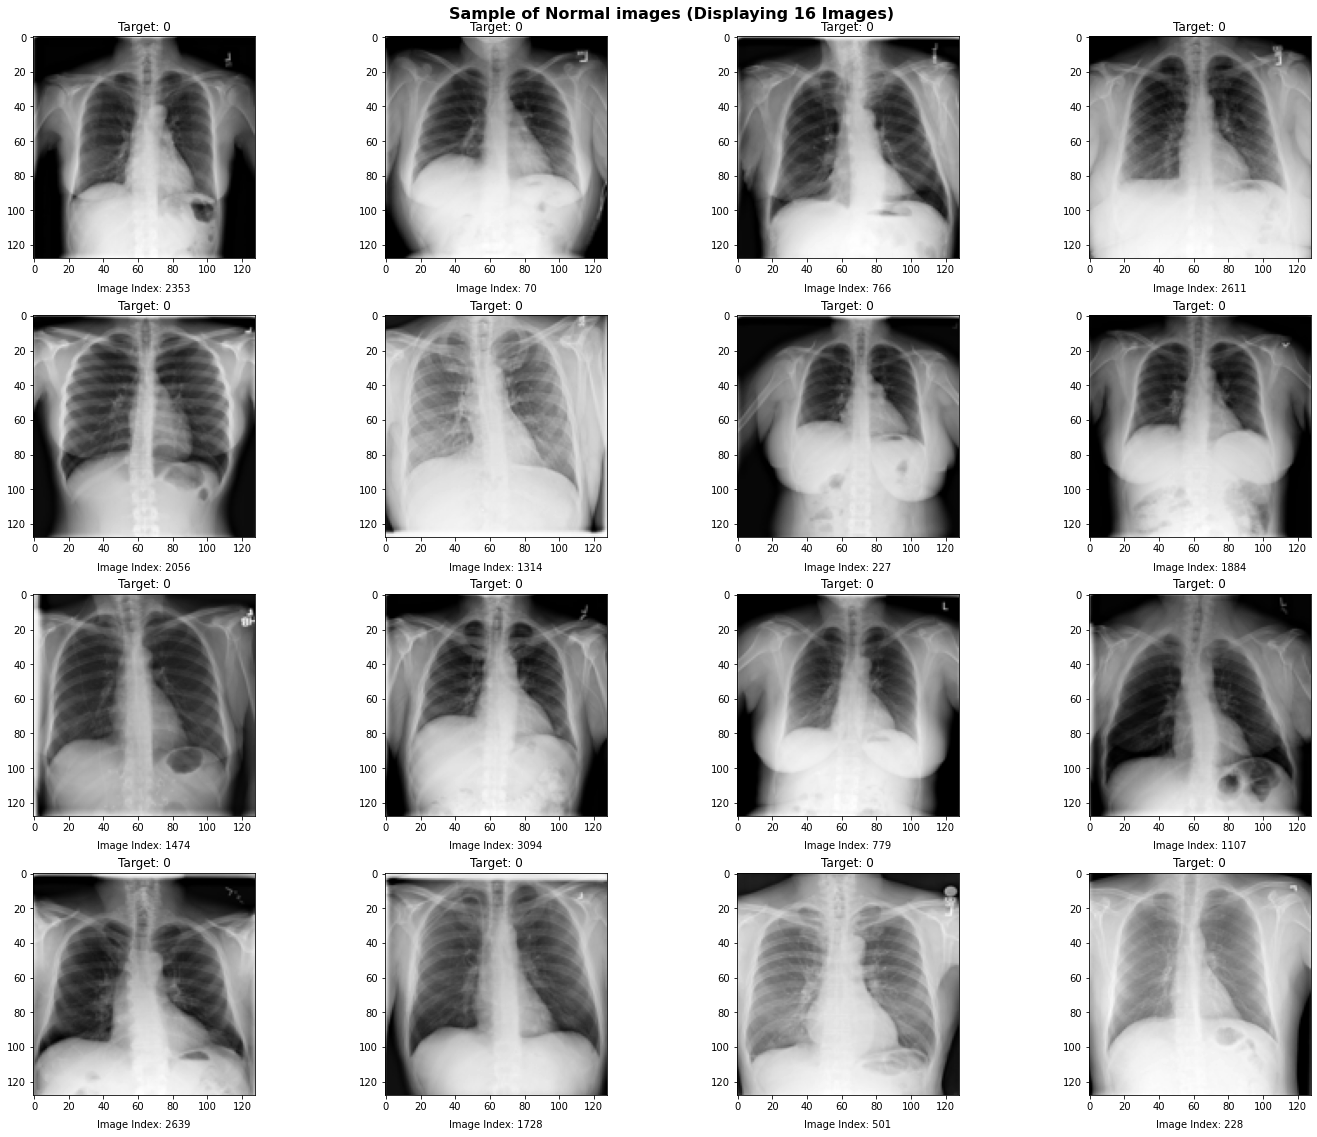

In [12]:
show_image(images=df_norm, 
           target=target_norm,
           title='Sample of Normal images',
           num_display=16, 
           num_cols=4, 
           cmap='gray', 
           random_mode=True)

### Tuberculosis

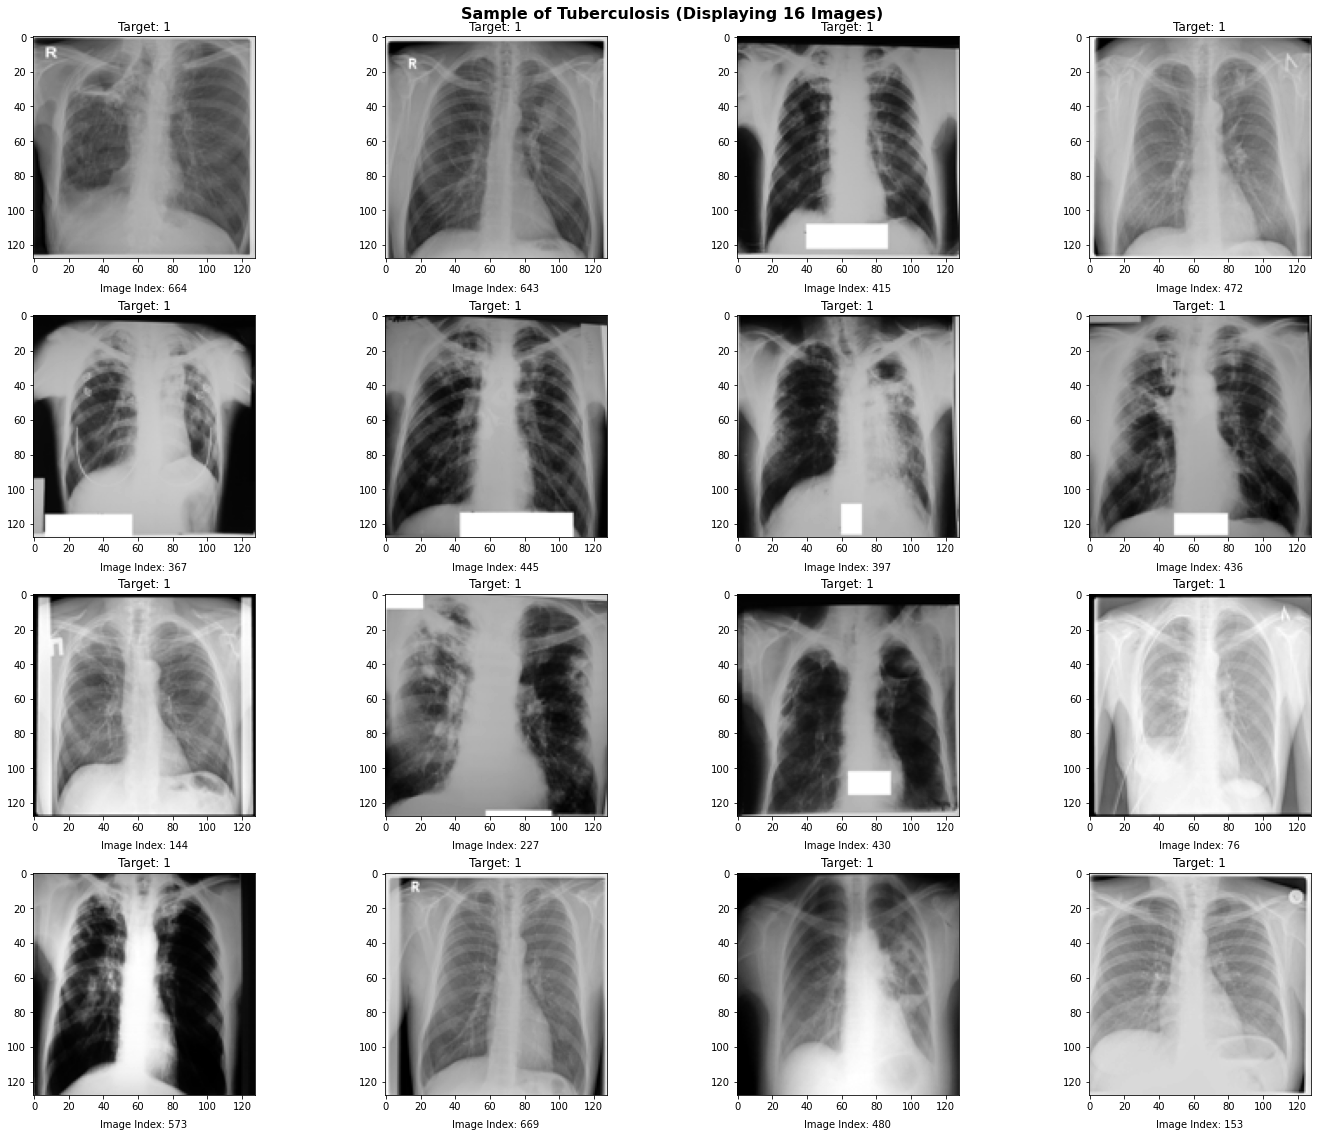

In [13]:
show_image(images=df_tb,
           target=target_tb,
           title='Sample of Tuberculosis', 
           num_display=16, 
           num_cols=4, 
           cmap='gray', 
           random_mode=True)

## 1.3 Data Check-up

### 1.3.1 Histogram Analysis
Analyzing the Distribution/histograms of pixel intensity values for a representative sample of images. This can help identify images with unusual contrast or exposure levels.


### Distribution of intensity pixel (Normal vs Tuberculosis)

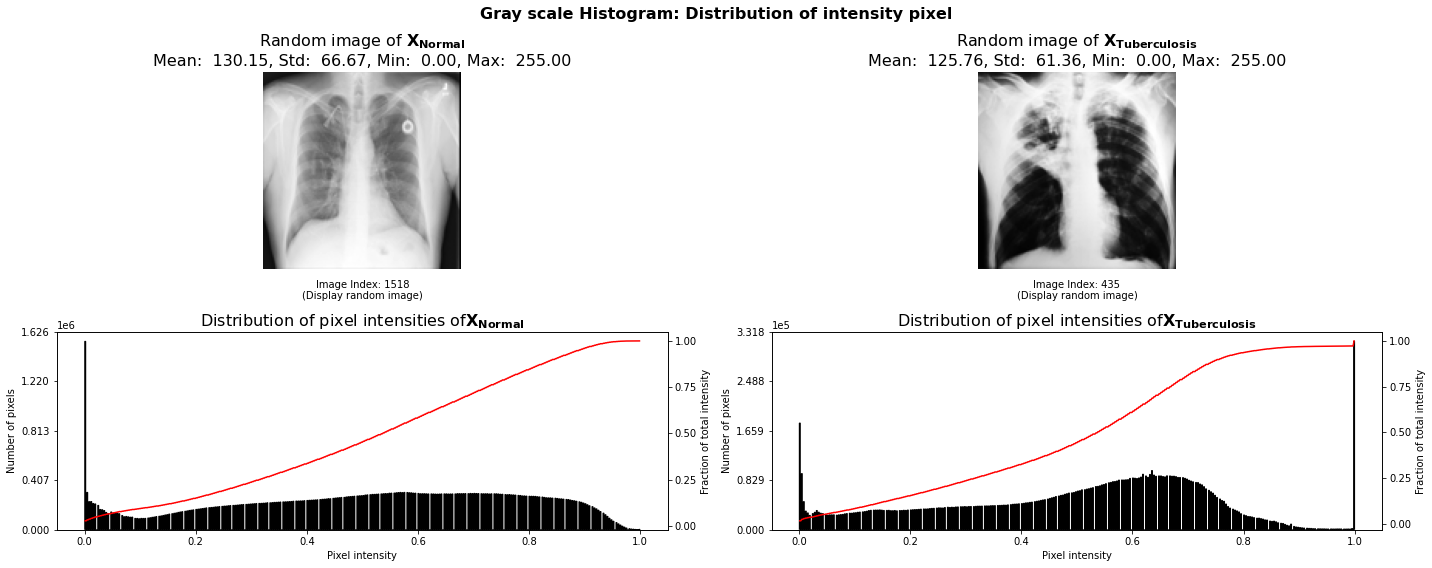

In [14]:
images = [df_norm, df_tb]
subsets = ['X_{Normal}', 'X_{Tuberculosis}']
# For visualization
plot_gray_scale_histogram(images=images, titles=subsets, bins=555)


**Explaination:**
- **Pixel Intensity** 0 (completely black) to 255 (completely white)
- **X-axis** (Pixel intensity) represents the entire dataset's darkness (closer to 0) to brightness (closer to 255).
- **Slope Red line** refer to brighter or darker of all dataset
    - Right-Skewed Distribution, mean pixel intensity is higher, indicating brighter areas.
    - Left-Skewed Distribution, mean pixel intensity is lower, signifying darker areas.
So, 
- **X_{Tuberulosis}** have a brighter or whiter arease
- **X_{Normal}** have a darker areas 

## 1.4 Data Augmentation (Class imbalance problem) (Optional):
Perform data augmentation techniques such as rotation, scaling, flipping, and adding noise to increase the diversity and size of your training dataset. This helps in improving the model's generalization ability.
### Objective
- solve class imbalance problem (700 TB images and 3500 normal images)

### Keras ImageDataGenerator
techniques:
- rotating the image a bit
- enlarging the image
- shrinking a little bit
- changing the contrast of the image
- mirror image 

### Clinical Perspective
clinical perspectives when applying data augmentation techniques to X-ray images to ensure the generated images align with real clinical scenarios and avoid introducing unnecessary noise or unrealistic features.

Presented here is some of that clinical input for consideration:

(not recommended)
1. Reflection: Reflection in x-axis is a step that is unusual, as the x-ray is flipped upside down. 
    - This step is “not recommended,” as it is an adding unnecessary noise that may mislead the learning algorithm. 
    - For example, applying this step for digit recognition is “not recommended,” the neural network will not be able differentiate between number 6 and number 9. Reflection in y-axis does not change Posterior-Anterior (PA) to Anteroposterior (AP). However, it would lead to **non-physiologic** images (e.g., heart in the right thorax rather than the left thorax), which might confound learning and is “not recommended.” There is no existing data augmentation technique that can simulate the differences between PA and AP chest x-ray images, since relative positioning in patient, x-ray tube, and detector produce differential magnification and affect edge definition.

(could be helpful)

2. Rotation: Applying rotation to X-ray images could be helpful. However, it depends on the range of rotation a severe rotations can be harmful. Slight rotations such as between −5 and 5 are seen in clinical practice, however, severe rotations such as between −90 and 90 are “not recommended,” as the generated X-rays are unlikely to be encountered, and can add unnecessary noise to the learning model.

(not recommended)

3. Scaling: Scaling can be in x-axis, y-axis, or both. When large scaling (>× 1) is applied, regardless of the direction, the augmented X-ray image will be a stretched version of the original X-ray. When a small scaling (<× 1) is applied, the size augmented X-ray will be less than the original image. An equal scaling in x-axis and y-axis is “possible,” however, scaling in only the x-axis or y-axis can be considered “not recommended” clinically.

(not recommended)

4. Shearing: Shearing can be applied to x-axis, y-axis, or both directions. It is measured as an angle in degrees, and is in the range −90 to 90. The augmented X-ray images look like the original skewed in the specified direction(s). This step can be considered “not recommended,” as it produces images that do not exist clinically.

(could be helpful/acceptable)

5. Translation: Translation or “Shifting” X-ray images up, down, left, or right, could be a useful augmentation step. This is because the X-ray images do not always produce lungs in the center of the image. This can depend on the patient's position, as well as the radiographic unit itself, such as if it is portable. Having X-ray images where the lungs are centered could lead to a more robust COVID-19 detector. As such, this step seems to be “acceptable” clinically as it is observed. However, there is no clearly recommended range for translation.

Read more: https://www.frontiersin.org/articles/10.3389/fmed.2021.629134/full


### Summary of Clinical Perspective

| Augmentation Technique | Recommendation | Explanation |
| --- | --- | --- |
| Reflection (x-axis) | Not Recommended | Adds unnecessary noise and misleads the learning algorithm. |
| Reflection (y-axis) | Not Recommended | Leads to non-physiologic images and confounds learning. |
| Rotation | Could be helpful (within -5 to 5 degrees) | Slight rotations seen in clinical practice, but severe rotations are not recommended. |
| Scaling | Not Recommended | Large scaling stretches the image, small scaling reduces size. Equal scaling is possible, but x-axis or y-axis scaling is not recommended clinically. |
| Shearing | Not Recommended | Produces images that do not exist clinically. |
| Translation | Could be helpful/acceptable | Shifting X-ray images can be useful for better lung positioning, but no recommended range. |

In [15]:
from scripts.augmentation.image_augmenter import x_ray_image_augmentation


### ImageDataGenerator expectd 1D array 
- Add an extra dimension to the array

In [16]:
df_norm.shape

(3500, 128, 128)

In [17]:
df_tb.shape

(700, 128, 128)

### Add an extra dimension to the array 
1 channel of Grayscale

In [18]:
# # Add an extra dimension to the array.
df_norm = np.expand_dims(df_norm, axis=-1)
df_tb = np.expand_dims(df_tb, axis=-1)

In [19]:
df_norm.shape

(3500, 128, 128, 1)

In [20]:
df_tb.shape

(700, 128, 128, 1)

###  adding more 2,800 (Tuberculosis) Training examples

In [21]:
df_tb_augmented, target_tb_augmented = x_ray_image_augmentation(
    images=df_tb, targets=target_tb, sample_count=2800)

In [22]:
print(
    f'Before {df_tb.shape[0]}\nAfter Data Augmentation {df_tb_augmented.shape[0]}\n+{df_tb_augmented.shape[0]-df_tb.shape[0]} Training examples')


Before 700
After Data Augmentation 3500
+2800 Training examples


### After do augmetation

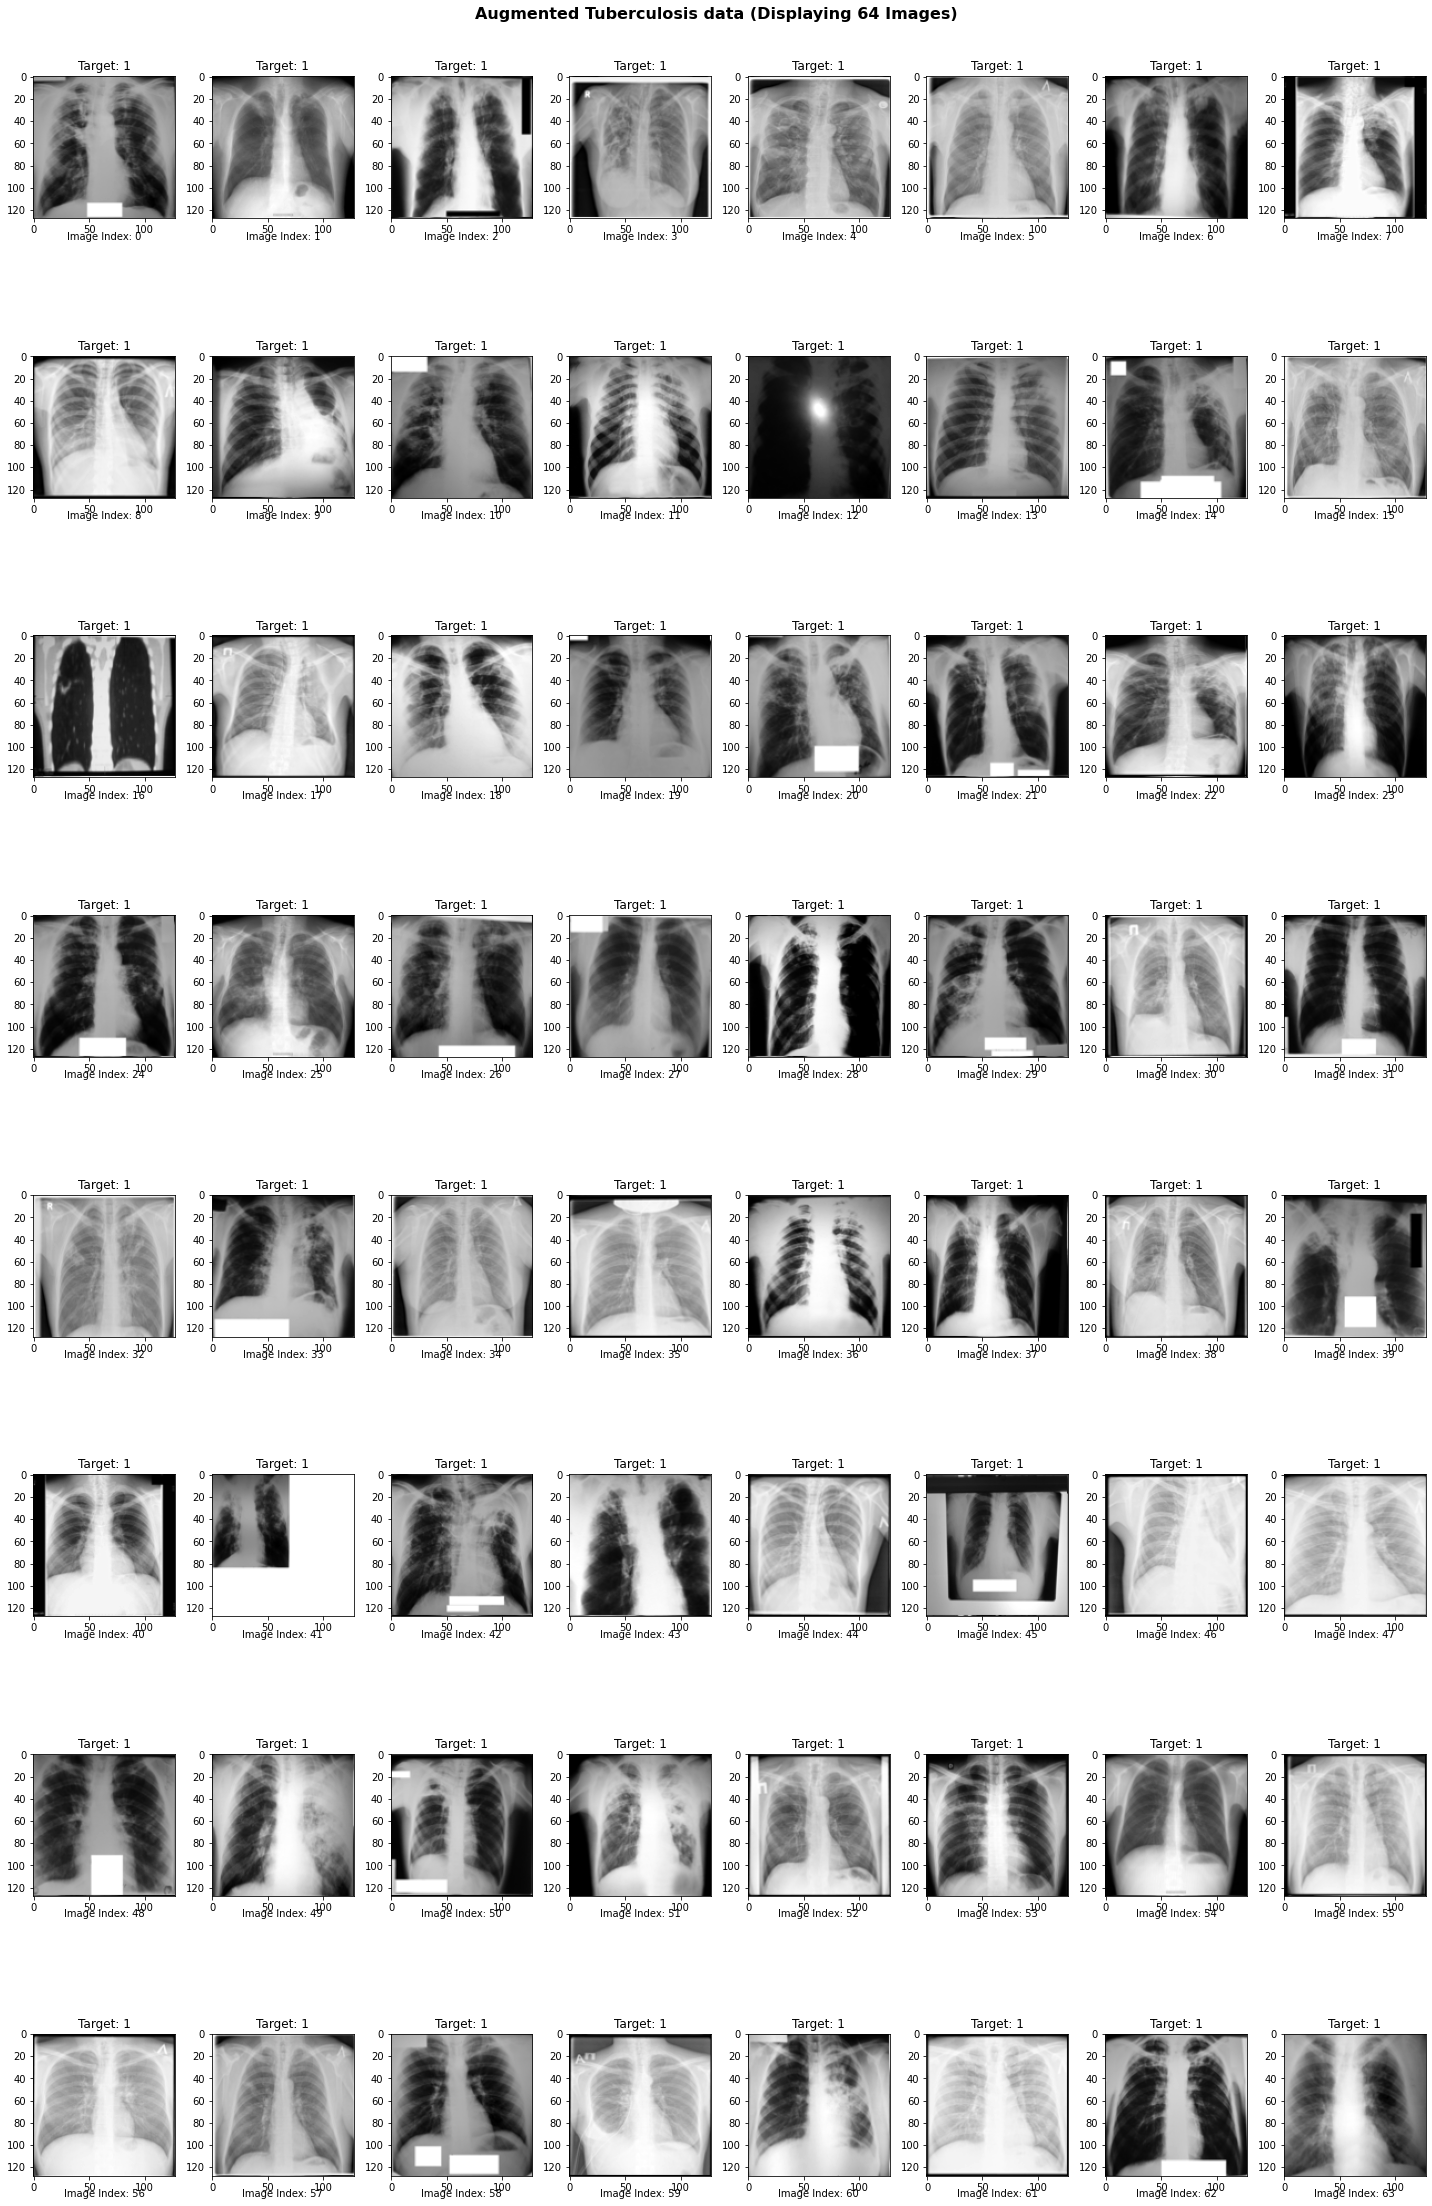

In [23]:
show_image(images=df_tb_augmented[700:764],
           target=target_tb_augmented[700:764],
           title='Augmented Tuberculosis data', 
           num_display=64, 
           num_cols=8, 
           cmap='gray', 
           random_mode=False)

### Compare Distribution (Tuberculosis vs Tuberculosis + Augmentation)

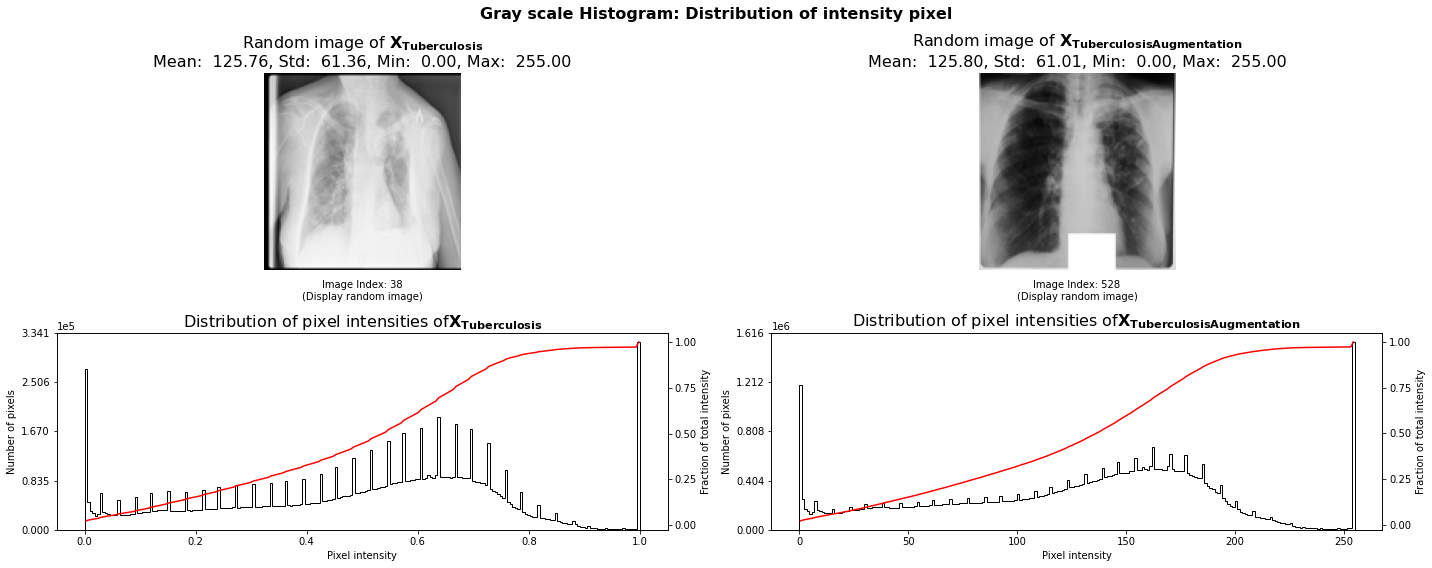

In [90]:
images_2 = [df_tb, df_tb_augmented]
subsets_2 = ['X_{Tuberculosis}', 'X_{TuberculosisAugmentation}']
# For visualization
plot_gray_scale_histogram(images=images_2, titles=subsets_2, bins=222)

## 1.5 Data Preparation
prepare data to facilitate further processing and training. We will create explicit variables that are easy to call and work with.

- **X**; representing 4200 samples, each with a size of 128x128 pixels. contains
    - 3500 samples will be the normal images 
    - 700 samples will be the TB images 

- **y**; represents the binary classification labels, where 
    - 0 represents a normal image
    - 1 represents a TB image. 

In [25]:
# Concatenate df_norm and df_tb along the first axis (samples)
X = np.concatenate((df_norm, df_tb_augmented), axis=0)

# Concatenate target_norm and target_tb
y = np.concatenate((target_norm,  target_tb_augmented), axis=0)

In [26]:
X.shape

(7000, 128, 128, 1)

In [27]:
y.shape

(7000,)

In [28]:
y_df = pd.DataFrame(y)

In [29]:
y_df.value_counts()

0    3500
1    3500
Name: count, dtype: int64

## 1.6 Image Enhancement 
Image Pre-processing for Chest X-ray

<u>used</u> to improve their visual quality and enhance the details within the images.

Aim: 
- Improve the visibility of details in the image
- Enhance the contrast of the image


In [30]:
from skimage import img_as_float
from skimage import exposure

### 1.6.1 Contrast Stretching:
- Objective: Enhance the visibility of details and improve contrast in an image.
- Goal: Increase the dynamic range of pixel values by stretching the intensity values to a desired range.
- Pros:
    - Simple and easy to implement.
    - Enhances the contrast and visibility of details in an image.
- Cons:
    - It may not be effective for images with extremely low or high contrast.
    - It can amplify noise or artifacts in the image.

In [31]:
def contrast_stretching(X):
    p2, p98 = np.percentile(X, (2, 98))
    stretched_img = exposure.rescale_intensity(X, in_range=(p2, p98))
    return stretched_img


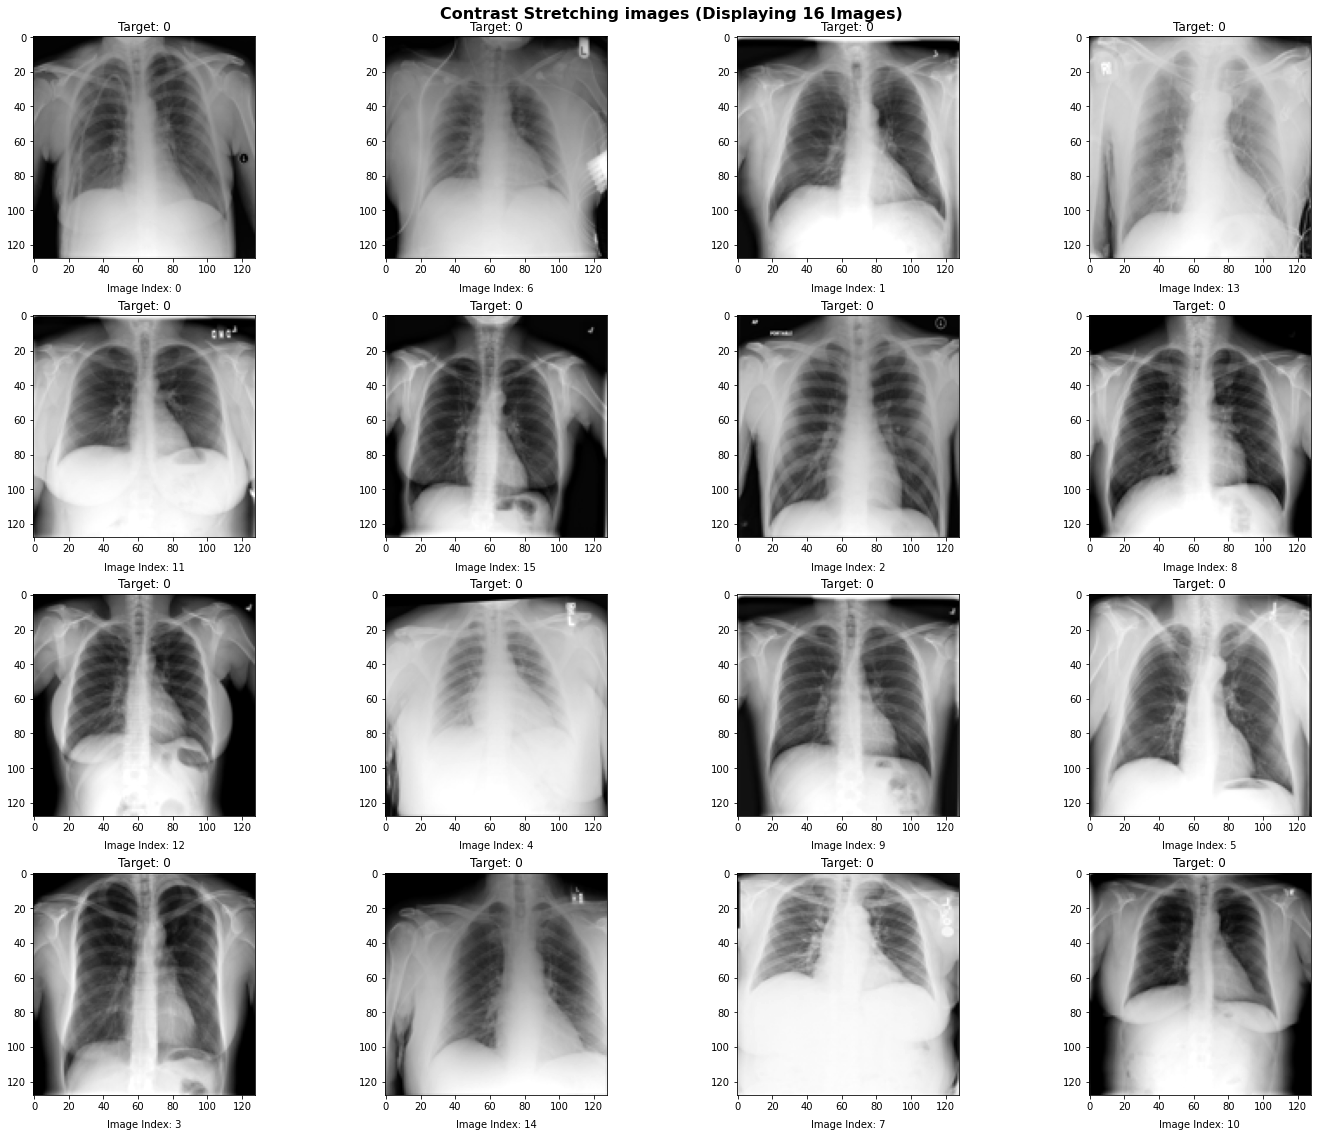

In [32]:
X_stretched = contrast_stretching(X[0:16])
show_image(images=X_stretched,target=y,title='Contrast Stretching images', num_display=16, num_cols=4, cmap='gray', random_mode=True)

### 1.6.2 Histogram Equalization:
- Objective: Enhance the global contrast and improve the overall brightness distribution in an image.
- Goal: Adjust the pixel intensity distribution to achieve a uniform histogram.
- Pros:
    - Effective in improving the global contrast of an image.
    - Enhances the visibility of details in both dark and bright regions.
- Cons:
    - May result in over-enhancement or unnatural appearance if applied to certain images.
    - Does not consider local image characteristics.

In [33]:
def equalization(X):
    eq_img = exposure.equalize_hist(X)
    return eq_img

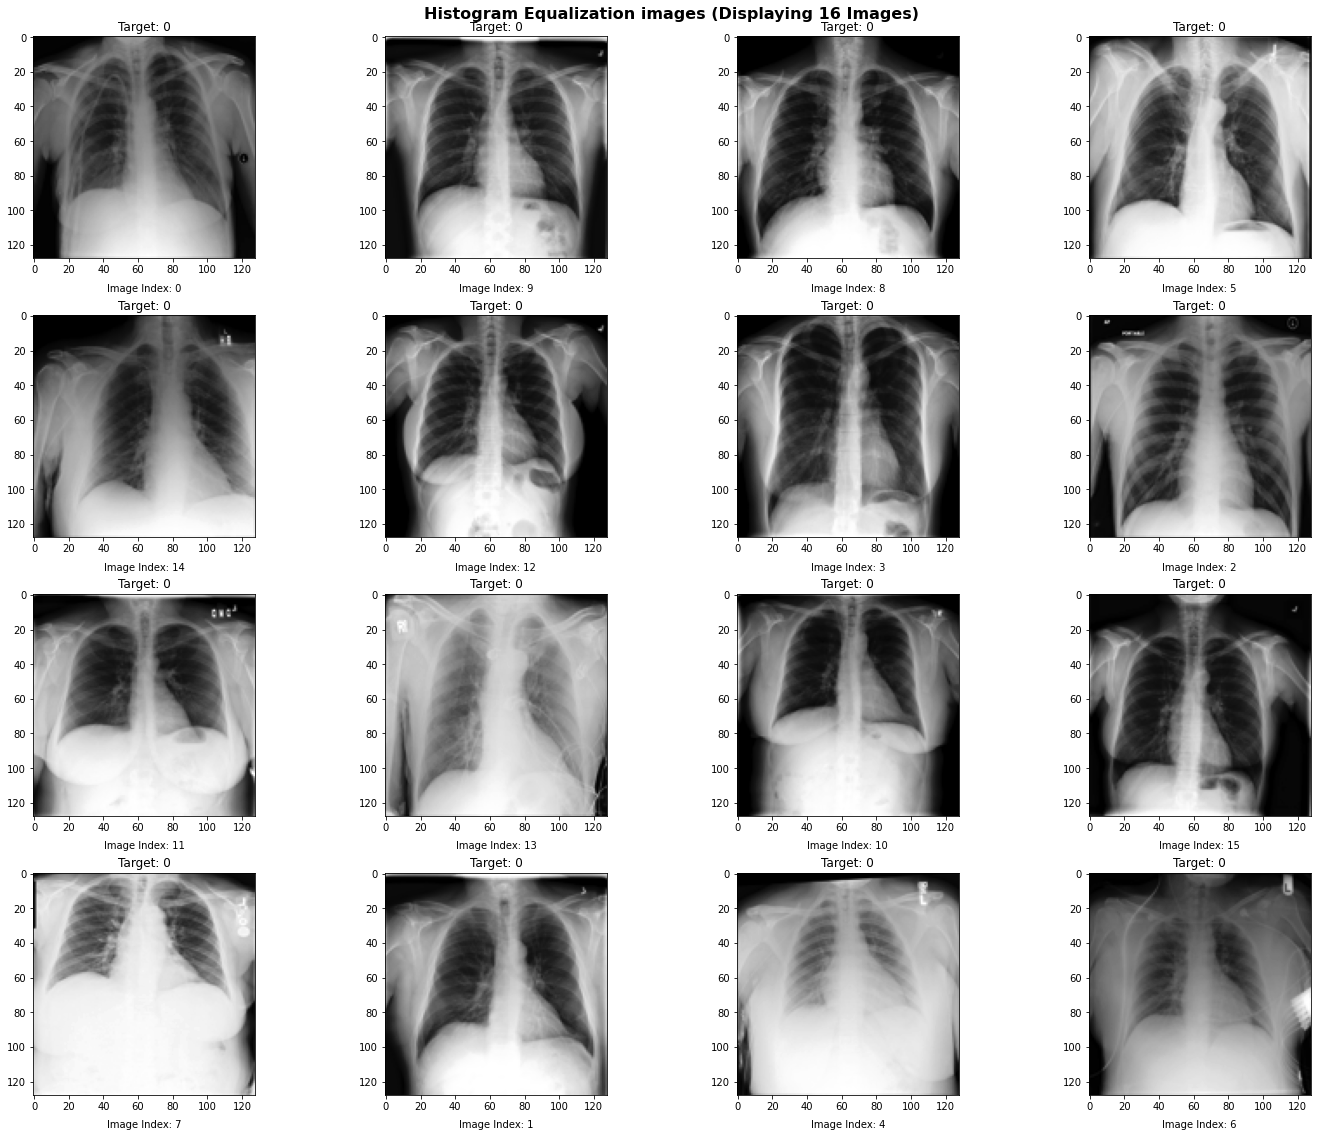

In [34]:
X_eq = equalization(X[0:16])
show_image(images=X_eq,target=y,title='Histogram Equalization images', num_display=16, num_cols=4, cmap='gray', random_mode=True)

### 1.6.3 Adaptive Histogram Equalization:
- Objective: Enhance the contrast while preserving local details in an image.
- Goal: Apply histogram equalization locally to different regions of an image.
- Pros:
    - Enhances the contrast of images with varying local characteristics.
    - Preserves local details and avoids over-enhancement in homogeneous regions.
- Cons:
    - Can amplify noise or artifacts in regions with high frequency variations.
    - Requires additional computational resources compared to global histogram equalization.


Usage example: 
``` python
def adaptive_equalization(X, clip_limit):
    '''
    :Parameters:
    X (ndarray (n,)): Input data as a numpy array, X.shape should be (128, 128, 1)
    clip_limit (int or float): used to control the contrast
    '''
    # Normalize the input image to the range of -1 to 1 and perform adaptive histogram equalization
    X_normalized = (X - np.min(X)) / (np.max(X) - np.min(X))
    X_normalized = (X_normalized * 2) - 1  # Scale to -1 to 1
    adapteq_img = exposure.equalize_adapthist(
        X_normalized, clip_limit=clip_limit)

    return adapteq_img

```

> Noted: I added '**batch_size**' parameter, Because of computational and memory constraints.

In [35]:
def adaptive_equalization(X, clip_limit, batch_size=None):
    '''
    :Parameters:
    X (ndarray (n,)): Input data as a numpy array, X.shape should be (128, 128, 1)
    clip_limit (int or float): used to control the contrast     
    batch_size (int): Size of the batch to process. If None, the entire input is processed at once.
    '''
    if batch_size is None:
        # Normalize the input image to the range of -1 to 1 and perform adaptive histogram equalization
        X_normalized = (X - np.min(X)) / (np.max(X) - np.min(X))
        X_normalized = (X_normalized * 2) - 1  # Scale to -1 to 1
        adapteq_img = exposure.equalize_adapthist(
            X_normalized, clip_limit=clip_limit)
    else:
        # Process data in batches
        num_batches = int(np.ceil(len(X) / batch_size))
        batch_results = []

        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, len(X))

            # Normalize the input image to the range of -1 to 1 and perform adaptive histogram equalization for each batch
            X_normalized = (X[start_idx:end_idx] - np.min(X[start_idx:end_idx])) / \
                (np.max(X[start_idx:end_idx]) - np.min(X[start_idx:end_idx]))
            X_normalized = (X_normalized * 2) - 1  # Scale to -1 to 1
            adapteq_img_batch = exposure.equalize_adapthist(
                X_normalized, clip_limit=clip_limit)
            batch_results.append(adapteq_img_batch)

        # Concatenate the batch results
        adapteq_img = np.concatenate(batch_results, axis=0)

    return adapteq_img


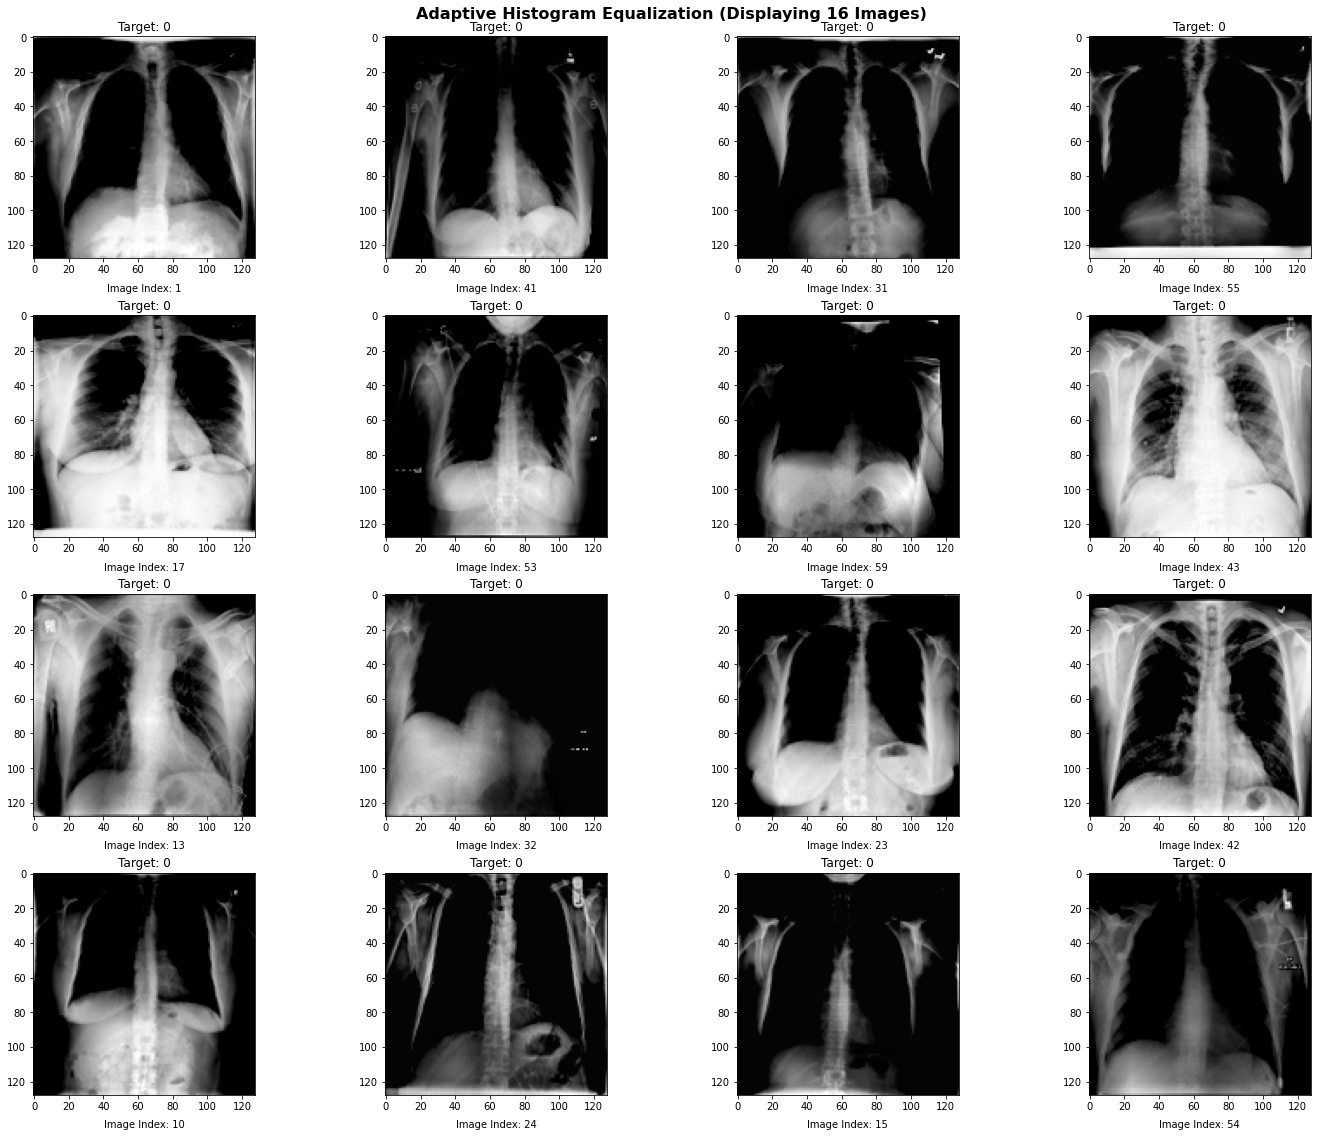

In [36]:
X_adapteq = adaptive_equalization(X[0:64],0.03)
show_image(images=X_adapteq,
            target=y,
            title='Adaptive Histogram Equalization', 
            num_display=16, 
            num_cols=4, 
            cmap='gray', 
            random_mode=True)

### Summary of each image enhancement 

In [37]:
from skimage import img_as_float
from skimage import exposure

def img_and_hist(image, axes, bins=100):
    '''
    Plot an image along with its histogram and cumulative histogram.
    '''
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    # ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


In [105]:
sample = X[0,:,:,:]

In [106]:
sample.shape

(128, 128, 1)

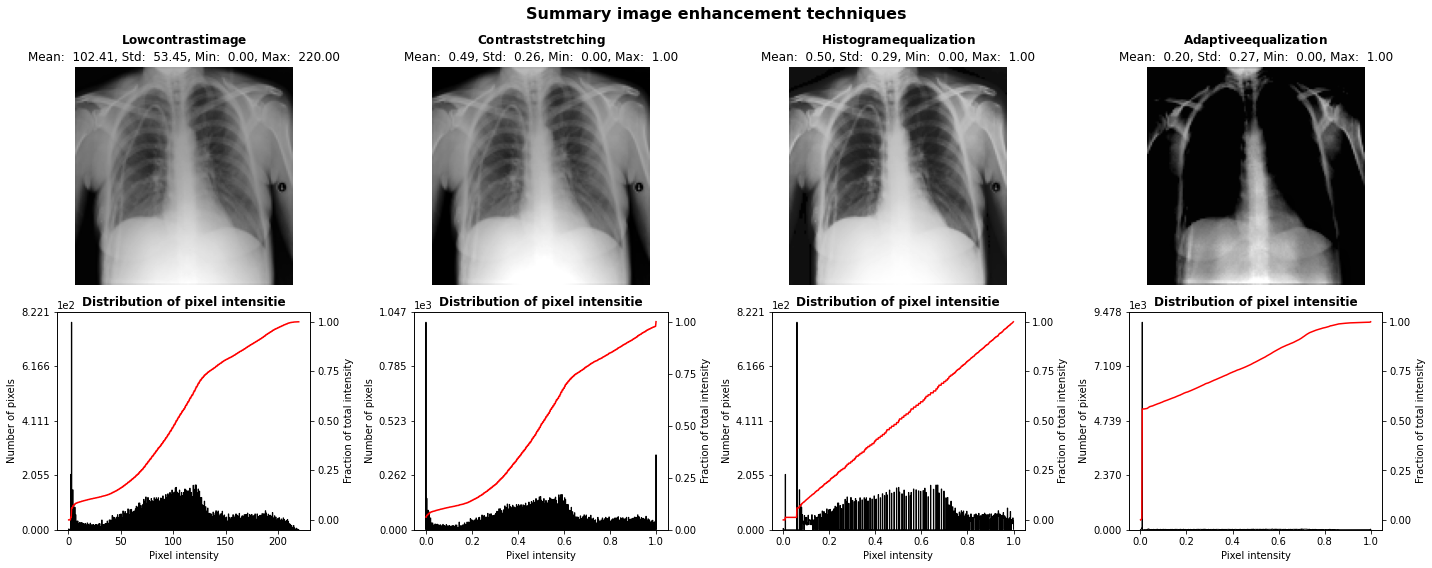

In [109]:
# Load a normal image
img = sample

# Contrast stretching
img_rescale = contrast_stretching(img)

# Histogram Equalization
img_eq = equalization(img)

# Adaptive Equalization
img_adapteq = adaptive_equalization(img, 0.03)

methods = ['Low contrast image', 'Contrast stretching',
           'Histogram equalization', 'Adaptive equalization']
images_3 = [img, img_rescale, img_eq, img_adapteq]

# Display results
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, (method, image) in enumerate(zip(methods, images_3)):
    ax_img, ax_hist, ax_cdf = img_and_hist(image, axes[:, i], bins=555)

    mean_value = np.mean(image)
    std_value = np.std(image)
    min_value = np.min(image)
    max_value = np.max(image)

    ax_img.set_title(
        r'$\bf{' + f'{method}'+'}$'+f'\nMean: {mean_value: .2f}, Std: {std_value: .2f}, Min: {min_value: .2f}, Max: {max_value: .2f}', fontsize=12)

    y_min, y_max = ax_hist.get_ylim()
    ax_hist.set_title(
        'Distribution of pixel intensitie', fontsize=12, fontweight='bold')
    ax_hist.set_ylabel('Number of pixels')
    ax_hist.set_yticks(np.linspace(0, y_max, 5))

    ax_cdf.set_ylabel('Fraction of total intensity')
    ax_cdf.set_yticks(np.linspace(0, 1, 5))

plt.suptitle('Summary image enhancement techniques',
             fontsize=16, fontweight='bold')
# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()


### Explanation

**Overview of plot**: aims to improve the contrast "Low contrast image."

**Red line**: (Black/White balances) A steeper curve indicates an increased Black/White intensity

| Method | Range | Pixel Intensity Distribution | Image | Conclusion | 
| --- | --- | --- | --- | --- |
| Low Contrast | [0, 255] | Original image | Original image | Original image |
| Contrast Stretching | [0, 1] | Similar distribution to original image | Similar to original image | Dataset normalized, Distribution similar to original image |
| Histogram Equalization | [0, 1] | New distribution | Similar to original image, But a little bit higher contrast |  Dataset normalized, Black/White is balanced |
| Adaptive Histogram Equalization | [0, 1] | New distribution | High contrast, Different local contrast in different regions of the image compared to the original image | Dataset normalized, Desirable contrast |

### How to consider 
<u>Answer</u> In fact we need to experiment <b>all image enhancement techniques</b> for Training in CNN, Which one give us a better Performance?


## 1.7 Normalization
two different techniques used to scale pixel values in an image. 
1. Min-Max Normalization:
    - useful when you want to rescale pixel values while preserving the original distribution's shape.
2. Dividing by 255:
    - quick and simple way to achieve a similar effect to min-max normalization, prepare it for deep learning models, which generally expect input values in the [0, 1] range.


### 1.7.1 Min-Max Normalization
Objective: 
- <u>used</u> to scale the pixel values of an image to the [0, 1] range.
- <u>preserve</u> the original distribution's shape 
    
Pros:

- Ensures that the pixel values are within a specific range
- Improved Training Convergence
- Preserves the relative relationships among the pixel intensities, maintaining the information contained in the image.

Cons

- If the image contains outliers or extreme values, they can still affect the normalization process and may result in loss of information or distortion.

The normalization formula is given by:

$$X_{scaled} = \frac{{X - X_{min}}}{{X_{max} - X_{min}}}$$


Usage example:
``` python
def minmax_normalization(X):
    
    '''
    :Parameters:
    X (ndarray (n,)): Input data as a numpy array
    '''
    # Perform Min-Max Normalization
    X_norm = (X - np.min(X)) / (np.max(X) - np.min(X))

    return X_norm
```

In [41]:
from scripts.feature_util.feature_scaler import ImageScaler


In [42]:
scaler = ImageScaler()

In [43]:
X_normalized = scaler.min_max(X)

### Before Normalization

#### 1. Distribution

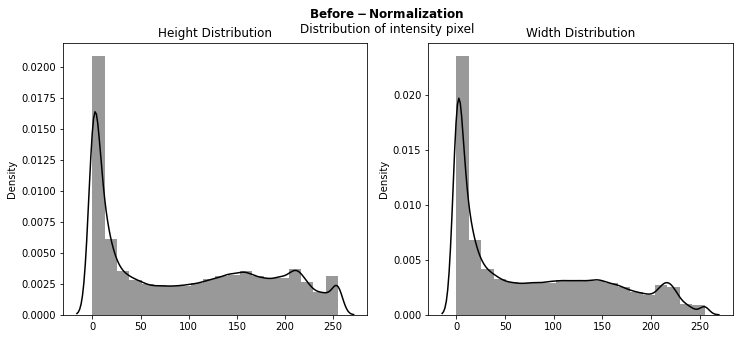

In [44]:
title = r'$\bf{'+'Before-Normalization' + \
    '}$'+'\nDistribution of intensity pixel'

plot_image_distribution(X, title)

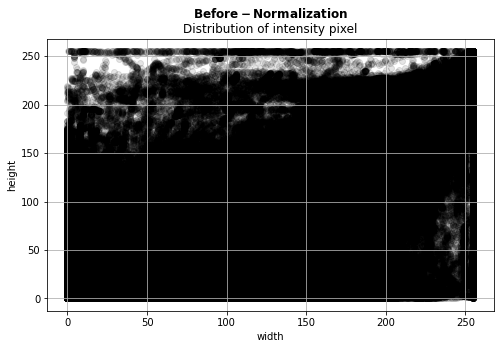

In [45]:
plot_image_scatter(X, title)

#### 2. Image

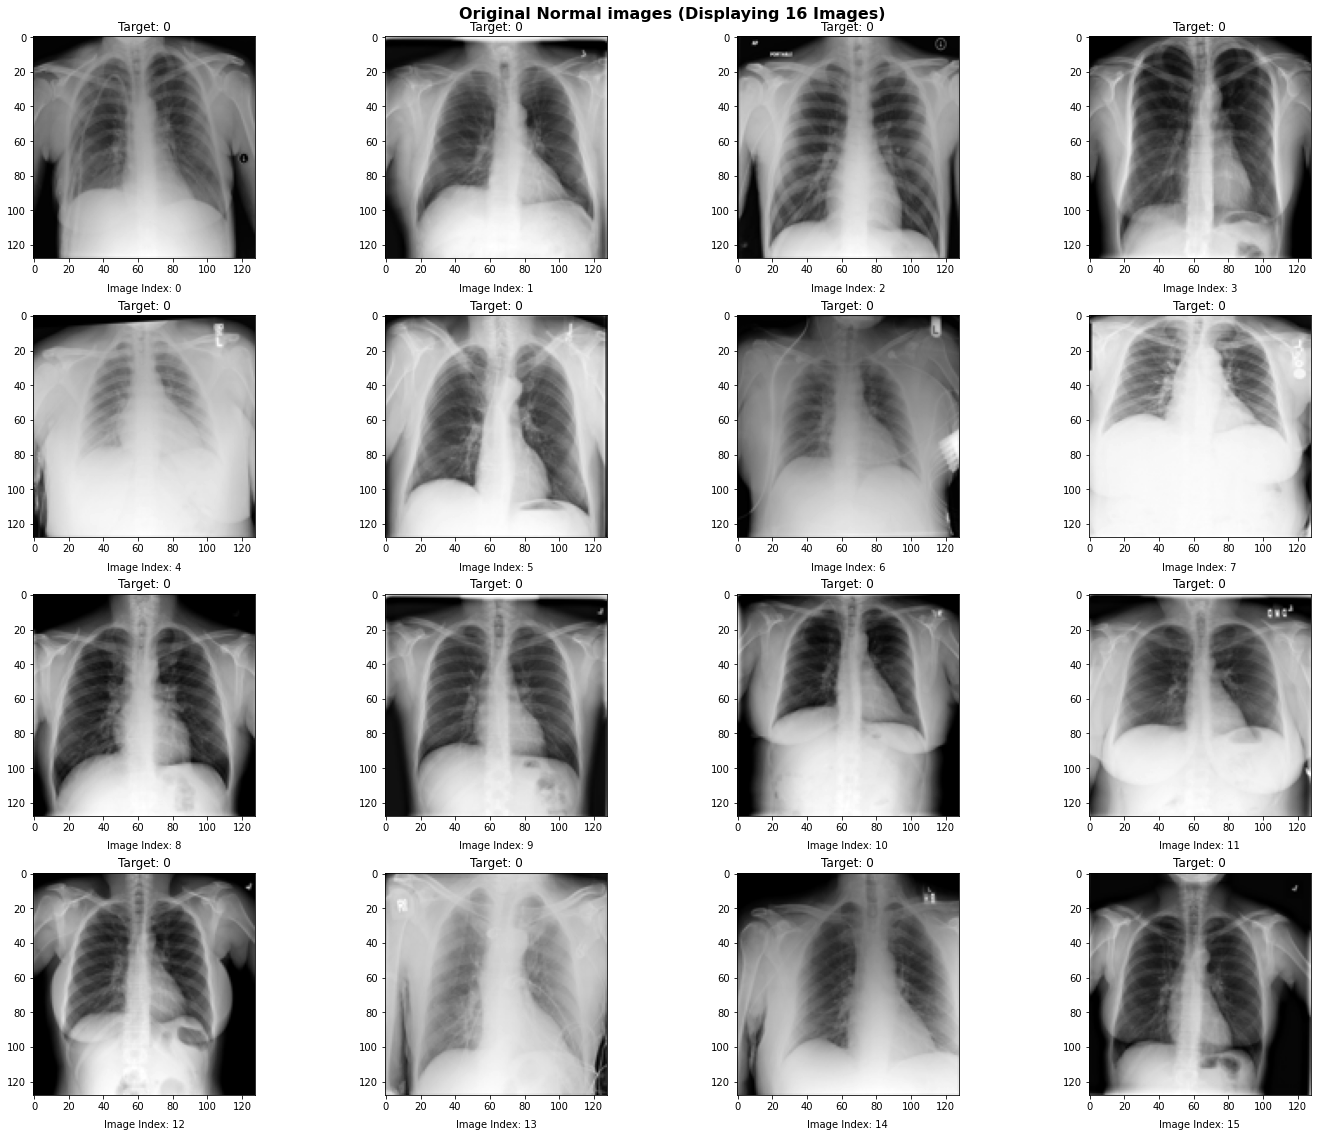

In [46]:
show_image(images=X,
            target=y,
            title='Original Normal images', 
            num_display=16, 
            num_cols=4, 
            cmap='gray', 
            random_mode=False)

### After Normalization

#### 1. Distribution

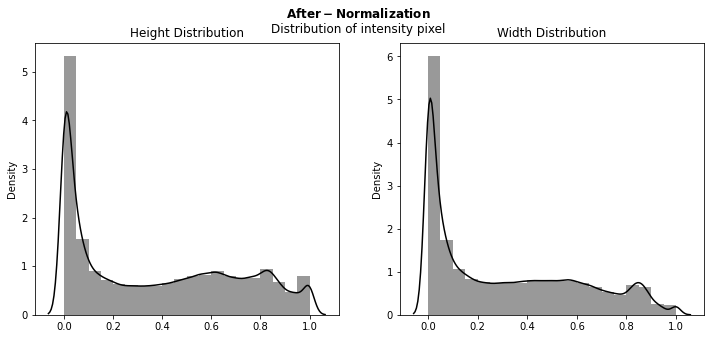

In [47]:
title = r'$\bf{'+'After-Normalization' + \
    '}$'+'\nDistribution of intensity pixel'

plot_image_distribution(X_normalized, title)


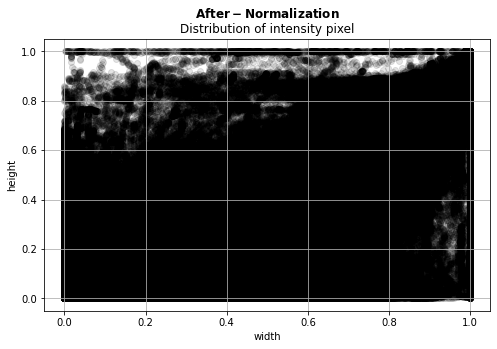

In [48]:
plot_image_scatter(X_normalized, title)

#### 2. Image

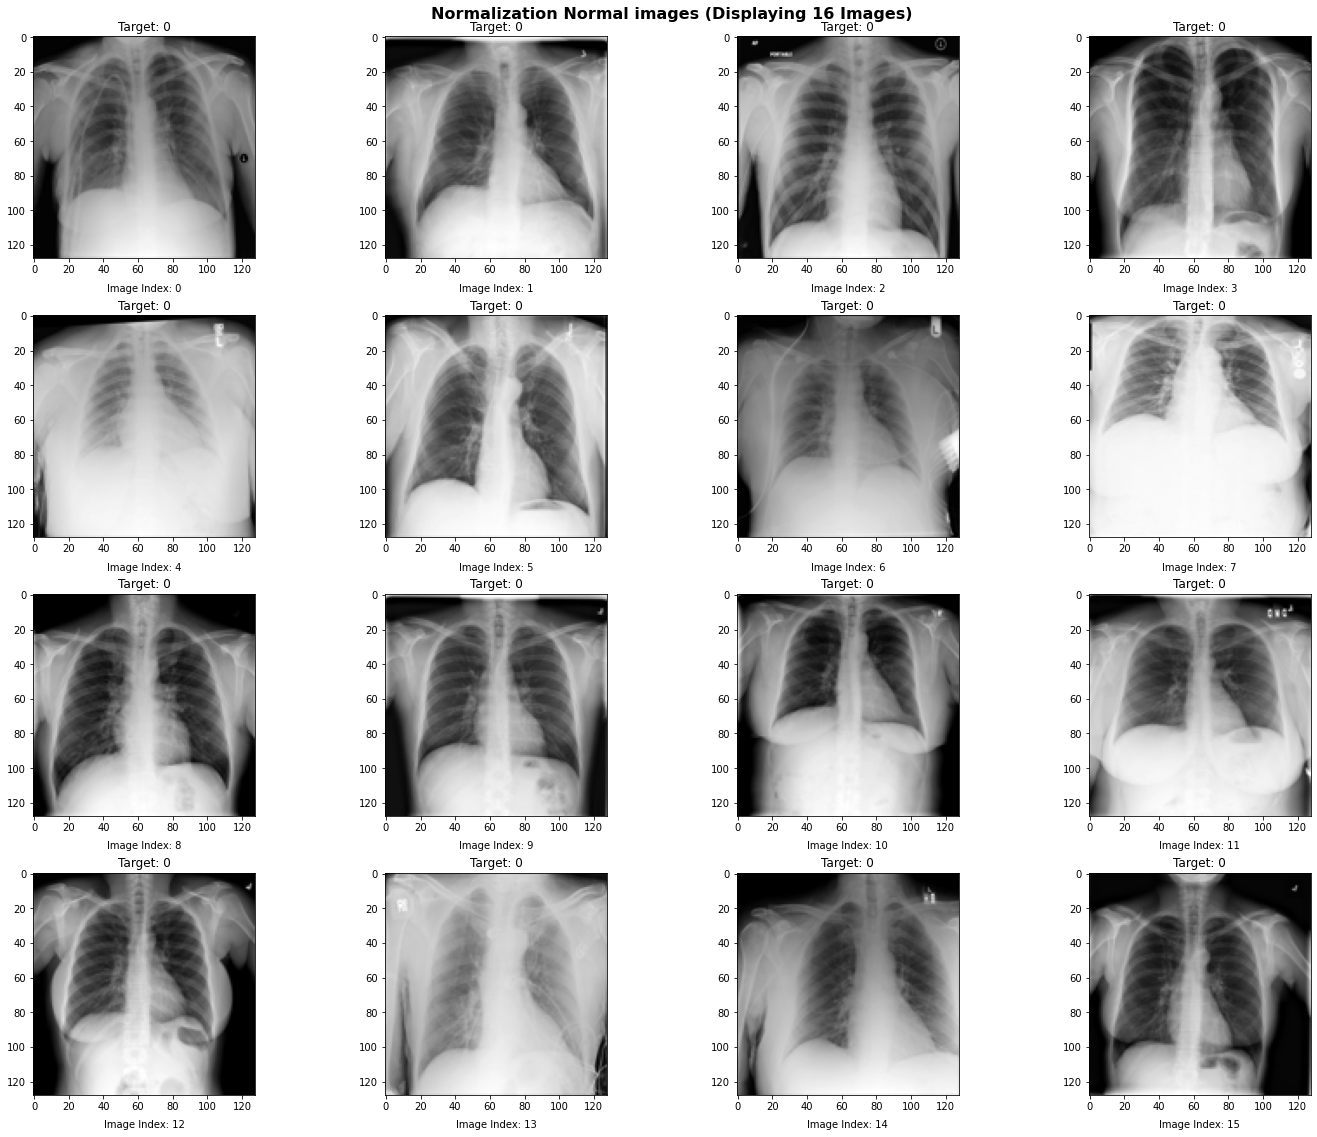

In [49]:
show_image(images=X_normalized, target=y,title='Normalization Normal images', num_display=16, num_cols=4, cmap='gray', random_mode=False)

## 1.8 Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning to reduce the complexity of high-dimensional data. In the context of Tuberculosis Detection using Chest X-ray images, PCA can be applied as a preprocessing step to reduce the dimensionality of the image data while preserving important information.

if training time is a concern

PCA had a really great performance in reducing dimensionality without losing too much information.

**Problem**
- **Training Time**
- High number of features can suffer from **increased computational** complexity, **overfitting**.

**Objective**:
- Transforms the original **high-dimensional** image data <u>into</u> a **lower-dimensional** representation while preserving the most important information.

**Pros**: 
- Reduce the high-dimensional of the image data while preserving important information.
- Capture the most significant information in the data.
- Computationally efficient for the Neural Network model.

**Cons:**
- Loss of information.
- Loss of accuracy compared to using the original high-dimensional data.
- Interpretability

In [50]:
from sklearn.decomposition import PCA

In [51]:
import plotly.graph_objects as go

### 1.8.1 Finding Optimum Number of Principle Component

#### Input data
- reshaping the input data to a 2D array of shape (7000, 16384), where each image is flattened into a 1D array.

In [52]:
X.shape

(7000, 128, 128, 1)

In [53]:
# Reshape the input data to (n_samples, n_features)
X_reshaped = X.reshape((X.shape[0], -1))  # Flatten the images to (7000, 16384)


In [54]:
X_reshaped.shape

(7000, 16384)

Before PCA applying:
- Centering (Mean = 0): The mean of each feature should be shifted to zero
- Scaling: Additionally, feature scaling should be applied to ensure that the ranges of the features are not too disparate. Feature scaling standardizes the feature values

In [55]:
def standardization(X):
    '''
    :Parameters:
    X (ndarray (n,)): Input data as a numpy array.
    '''
    # Perform feature scaling (standardization)
    X_scaled = (X - np.mean(X)) / np.std(X)

    return X_scaled

In [56]:
X_standardization = standardization(X)

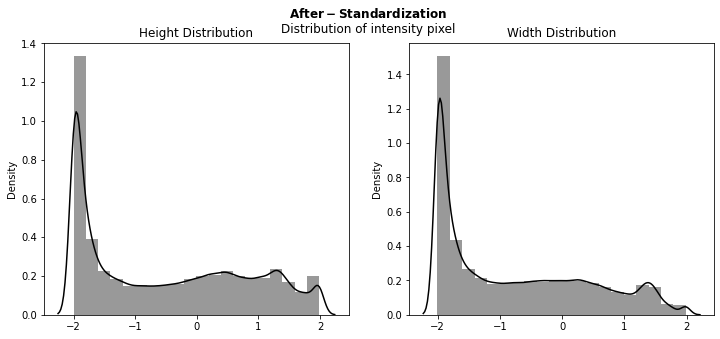

In [57]:
title = r'$\bf{'+'After-Standardization' + \
    '}$'+'\nDistribution of intensity pixel'

plot_image_distribution(X_standardization, title)


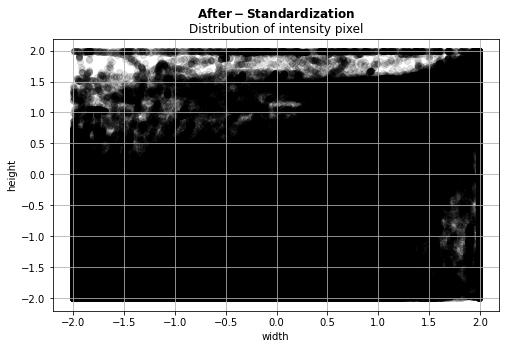

In [58]:
plot_image_scatter(X_standardization, title)

In [59]:
# Reshape the input data to (n_samples, n_features)
# Flatten the images to (7000, 16384)
X_standardization_reshaped = X_standardization.reshape(
    (X_standardization.shape[0], -1))


In [60]:
X_standardization_reshaped.shape

(7000, 16384)

input of PCA is a 2D array of shape (n_samples, n_features):
- row represents a data point (image)  
- column represents a feature (pixel).

In [61]:
pca = PCA()
pca.fit(X_reshaped)

explainRatio = pca.explained_variance_ratio_
explainRationCum = np.cumsum(pca.explained_variance_ratio_)

#### Plotly

In [1]:
where_n_component = 10

fig = plot_scree_cumulative(
    explainRatio, where_n_component, plot_type='plotly')
fig

NameError: name 'plot_scree_cumulative' is not defined

> Noted The number of principle components is less than or equal to the number of observations(images), because the (square) covariance matrix has a size
corresponding to the number of observations(images).


1000 and more PCA components represent the original data

Each Components given
- n = 20, explain +1% of the variance and capture 81% of the information in the data.
- n = 40, explain +6% of the variance and capture 87.00% of the information in the data.
- n = 100, explain +5.94% of the variance and capture 92.94.00% of the information in the data.
- n = 1000, explain +7% of the variance and capture 99.17% of the information in the data.

desired level of dimensionality reduction and the amount of information want to preserve.

<u>**choose**</u> n_components = 10

### 1.8.2 Image reconstruction
Explanation: Approximation to the original data

using 2,10, 1000, 3000 and 7000 principal components. As more principal components are used, the more the variance (information) is described.

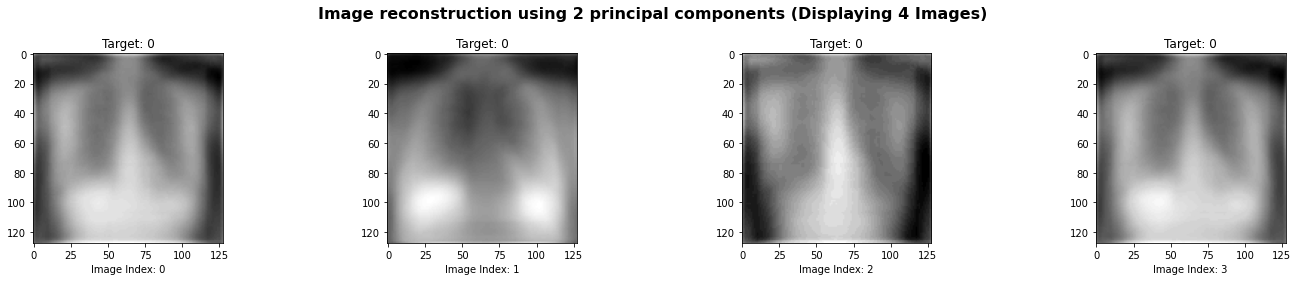

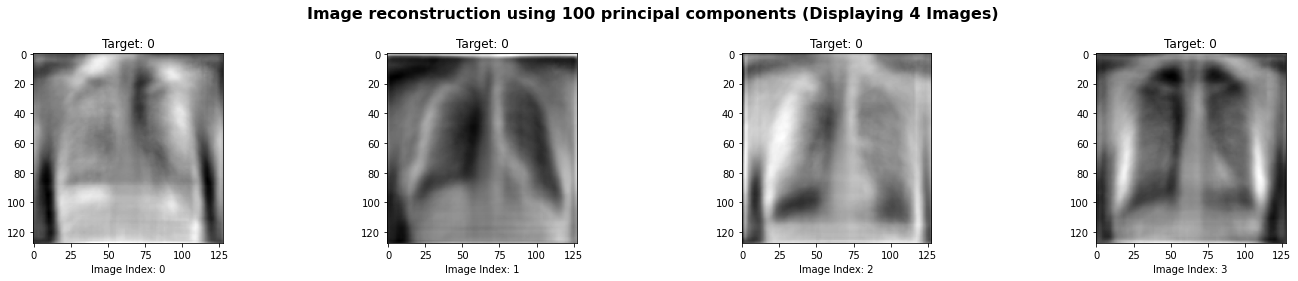

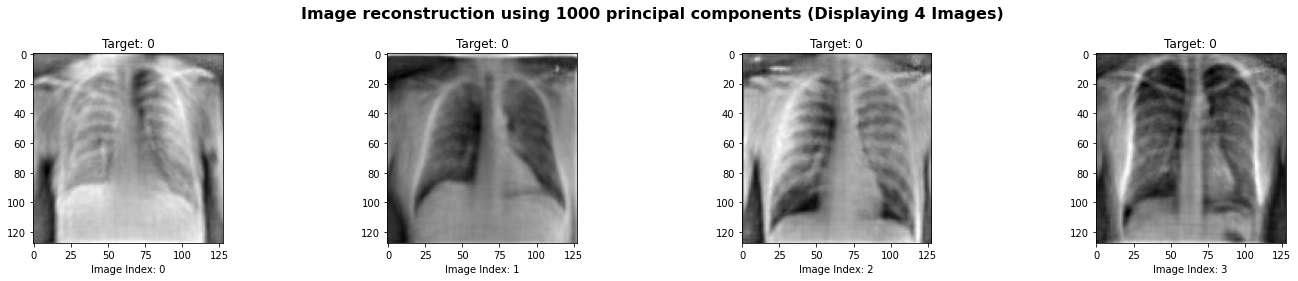

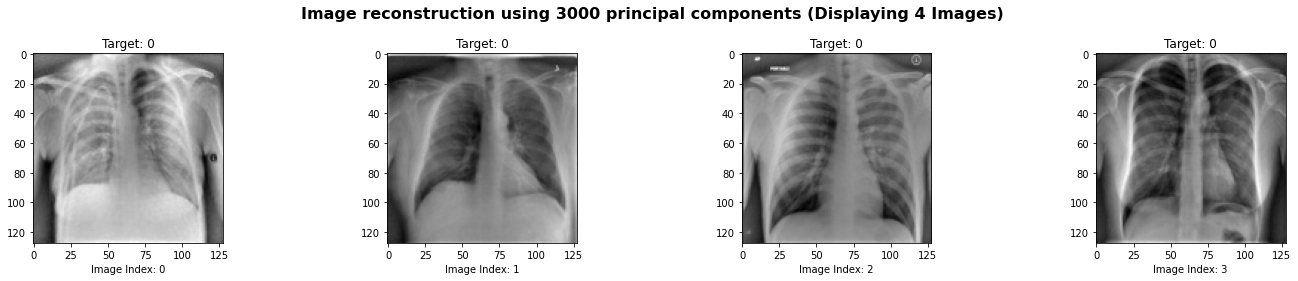

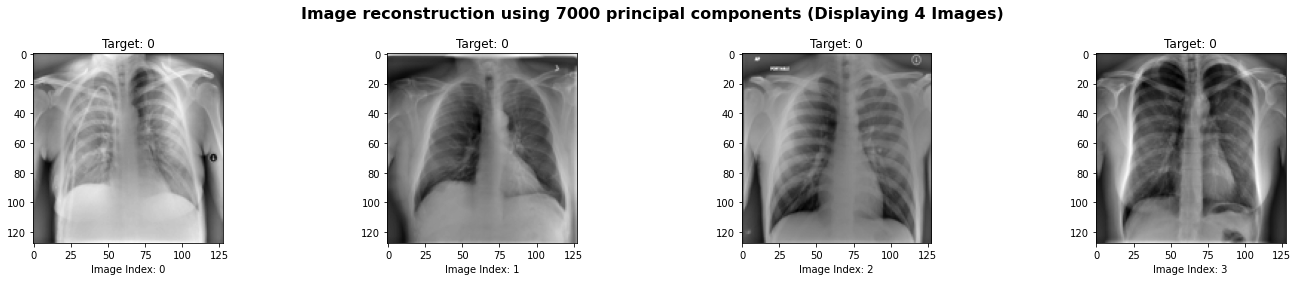

In [63]:
for n_component in [2,100,1000, 3000, 7000]:
    pca = PCA(n_components=n_component)
    # Fitting PCA on a subset of the training set (e.g., first 100 samples)
    pca.fit(X_reshaped)
    
    X_norm_pca = pca.transform(X_reshaped)
    
    X_norm_decom = np.dot(X_norm_pca, pca.components_)
    title = f'Image reconstruction using {n_component} principal components'
    
    show_image(X_norm_decom, target_norm,
               title, num_display=4, num_cols=4, cmap='gray', random_mode=False)


### Considering PCA
desired **n_components** of dimensionality reduction and the amount of information want to **preserve**.

<u>**choose**</u> n_components = 10

In [64]:
pca = PCA(n_components=10)
pca.fit(X_reshaped)
X_pca = pca.transform(X_reshaped)

In [65]:
df_pca = pd.DataFrame(
    X_pca, columns=[f'principal_component_{i + 1}' for i in range(10)])

In [66]:
df_pca

principal_component_1  principal_component_2  principal_component_3  \
0              -3243.334473           -1713.405151             432.560699   
1               1767.150635           -2146.460449            -551.575256   
2              -2226.060547            -413.169159              67.755226   
3              -2320.313477           -1751.244629             198.463242   
4               6399.157715           -2302.621338            1377.131104   
...                     ...                    ...                    ...   
6995           -1777.286255             617.643188             -52.278591   
6996           -2619.530273            2834.300293           -2536.816406   
6997            1324.077271            2677.569824           -1289.287598   
6998            1455.755005            2495.719482            1639.824585   
6999            5153.398438            2602.769043             130.585800   

      principal_component_4  principal_component_5  principal_component_6  \
0               -357.483887            -197.388428             446.967529   
1                583.603516           -3382.261230           -1222.454956   
2                795.765991           -1206.891235           -2251.950684   
3               -836.503784            -884.279175           -1311.219971   
4                549.436890             778.702576            -513.813782   
...                     ...                    ...                    ...   
6995             472.150360             350.015472              85.812218   
6996            -333.255707           -1686.423828            1149.330200   
6997            1368.008545            -947.958496              43.627522   
6998             -77.696609            -102.985855             594.365540   
6999           -3778.871338            1649.735229             644.688232   

      principal_component_7  principal_component_8  principal_component_9  \
0               -844.855225             743.644958             311.834473   
1               -337.191315           -1033.931152            -785.768188   
2               -182.658905             317.586517            -552.561707   
3                 77.445358             774.907166            1402.193237   
4                361.354065             570.380920            -313.109375   
...                     ...                    ...                    ...   
6995            1326.304077            -162.988907            -855.883301   
6996             464.445923            -652.783875             390.820343   
6997           -1206.272217            -804.482788             933.321350   
6998           -1857.619507            -853.121643             585.919800   
6999             229.966721             304.563477            -913.454468   

      principal_component_10  
0                 -13.550247  
1                 556.812439  
2                 818.361389  
3                1621.065430  
4                -734.958496  
...                      ...  
6995             1893.284912  
6996             -613.013000  
6997             1777.985352  
6998              689.626770  
6999            -1056.535400  

[7000 rows x 10 columns]

In [67]:
X_decom = np.dot(X_pca, pca.components_)

#### Output 
- After applying PCA, the data is reshaped back to the original 3D shape (n_samples, height, width, channels)

In [68]:
X_decom.shape

(7000, 16384)

In [69]:
X_reconstructed = X_decom.reshape(X.shape)


In [70]:
X_reconstructed.shape


(7000, 128, 128, 1)

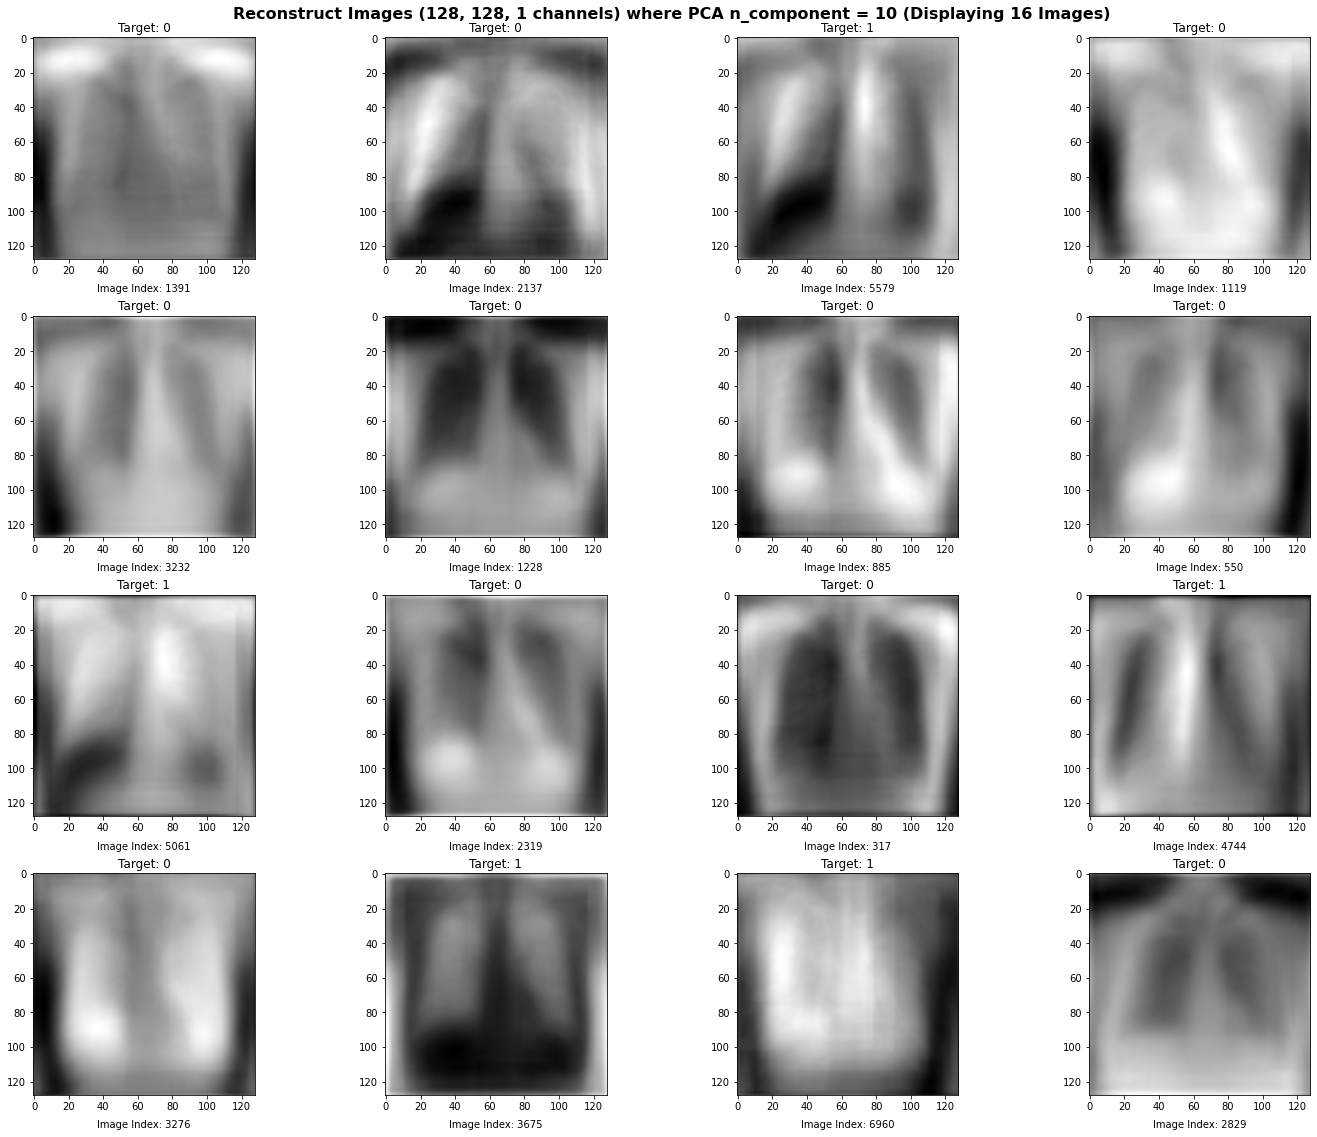

In [71]:
show_image(X_reconstructed, y,
           f'Reconstruct Images (128, 128, 1 channels) where PCA n_component = {10}', num_display=16, num_cols=4, cmap='gray', random_mode=True)


Original 

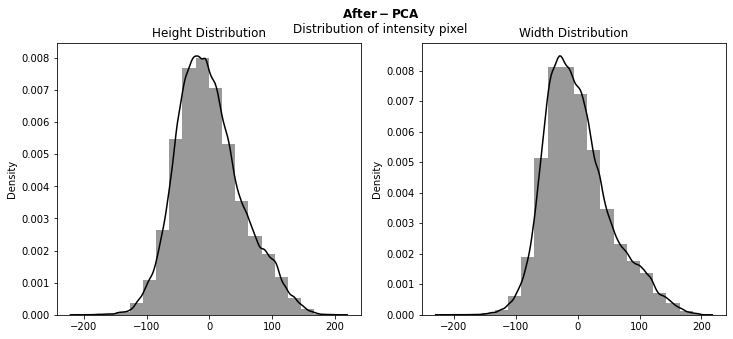

In [72]:
title = r'$\bf{'+'After-PCA' + \
    '}$'+'\nDistribution of intensity pixel'

plot_image_distribution(X_reconstructed, title)


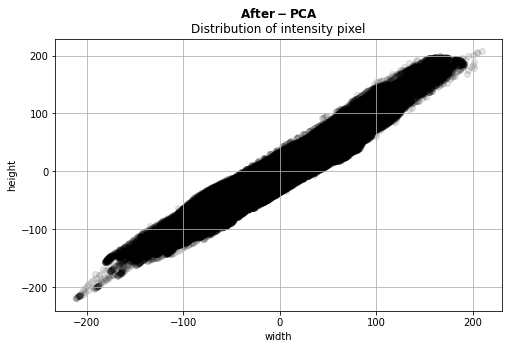

In [73]:
plot_image_scatter(X_reconstructed, title)


#### 2. Image

In [74]:
X_reconstructed = scaler.min_max(X_reconstructed)

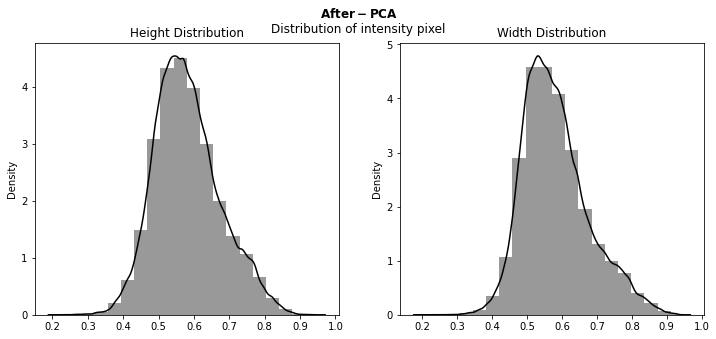

In [75]:
title = r'$\bf{'+'After-PCA' + \
    '}$'+'\nDistribution of intensity pixel'

plot_image_distribution(X_reconstructed, title)

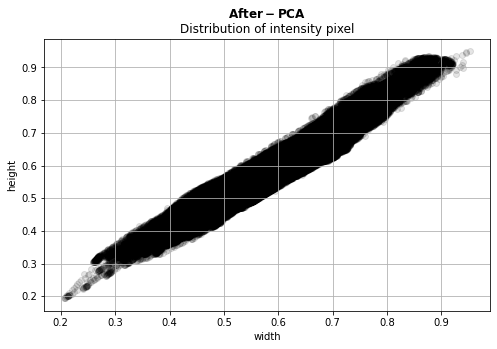

In [76]:
plot_image_scatter(X_reconstructed, title)

After do PCA, the data tends to exhibit a more **Gaussian** or **normal distribution**. 

## 1.9 Store Processed Dataset/Reference

### Subset of Training X
Explanation:
- **.shape()**: represents a 4-dimensional NumPy array, typically used to store images. 
- (number of images, height, width, channels)

1. Original (Normalized) dataset

In [77]:
# 1. Original
X_normalized.shape


(7000, 128, 128, 1)

2. Original (PCA) dataset

In [78]:
# 2. PCA
X_reconstructed.shape

(7000, 128, 128, 1)

3. Contrast stretching dataset


In [79]:
# 3. Contrast stretching
X_cs = contrast_stretching(X)
X_cs.shape


(7000, 128, 128, 1)

4. Histogram Equalization dataset

In [80]:
# 4. Histogram Equalization
X_eq = equalization(X)
X_eq.shape


(7000, 128, 128, 1)

5. Adaptive Equalization dataset

In [81]:
# 5. Adaptive Equalization
X_adapteq = adaptive_equalization(X, 0.05, batch_size=100)
X_adapteq.shape

(7000, 128, 128, 1)

In [82]:
dataset_dict = {
    'Original_normalized': X_normalized,
    'Original_pca': X_reconstructed,
    'Contrast_stretching': X_cs,
    'Histogram_equalization': X_eq,
    'Adaptive_Equalization': X_adapteq
}


### Store Reference

In [83]:
from scripts.repository.repository import Repository

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
repo = Repository()

for name, dataset in dataset_dict.items():
    repo.store(name=name, 
                dataset=dataset, 
                folder='reference',
                save_format='npy')

Saved [Original_normalized] dataset to [repositorys/metadata\reference\Original_normalized]
Saved [Original_pca] dataset to [repositorys/metadata\reference\Original_pca]
Saved [Contrast_stretching] dataset to [repositorys/metadata\reference\Contrast_stretching]
Saved [Histogram_equalization] dataset to [repositorys/metadata\reference\Histogram_equalization]
Saved [Adaptive_Equalization] dataset to [repositorys/metadata\reference\Adaptive_Equalization]


### Store X, y train

In [85]:
Xy_dict = {
    'X': X,
    'y': y,
}

In [118]:
for name, dataset in Xy_dict.items():
    repo.store(name=name,
               dataset=dataset,
               folder='numpy',
               save_format='npy')

Saved [X] dataset to [repositorys/metadata\numpy]
Saved [y] dataset to [repositorys/metadata\numpy]
